In [2]:
#Store these environment variables for later
la_vaca = 'moo'
ben = 'yees?'

In [22]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [12]:
processed_df = pd.read_pickle('./processed_df.pkl')

In [13]:
X = processed_df['string_tokens']
y = processed_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
vectorizer = TfidfVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [15]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)


KNeighborsClassifier()

In [16]:
y_preds_k = k_neighbors.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


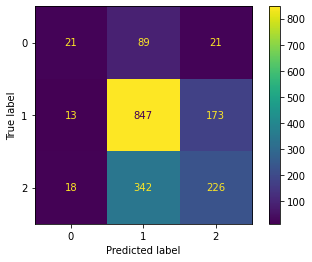

In [17]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [21]:
print(classification_report(y_preds_k, y_test))

              precision    recall  f1-score   support

           0       0.16      0.40      0.23        52
           1       0.82      0.66      0.73      1278
           2       0.39      0.54      0.45       420

    accuracy                           0.63      1750
   macro avg       0.46      0.53      0.47      1750
weighted avg       0.70      0.63      0.65      1750



In [23]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

y_preds_rfc = rfc.predict(X_test_vect)

In [24]:
print(classification_report(y_preds_rfc, y_test))

              precision    recall  f1-score   support

           0       0.20      0.70      0.31        37
           1       0.85      0.68      0.76      1289
           2       0.43      0.60      0.50       424

    accuracy                           0.66      1750
   macro avg       0.49      0.66      0.52      1750
weighted avg       0.73      0.66      0.68      1750



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


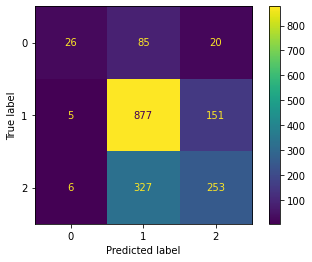

In [25]:
plot_confusion_matrix(rfc, X_test_vect, y_test)